In [231]:
%matplotlib inline
import numpy
from numpy.fft import fft
import scipy.io.wavfile
from scipy import signal
from scipy.fftpack import fft, fftshift
import time

import math 

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk


maximální hodnota je  0.1806640625
minimální hodnota je  -0.183929443359375
délka ve vzorcích je 39015
Délka v sekundách je 2.438375


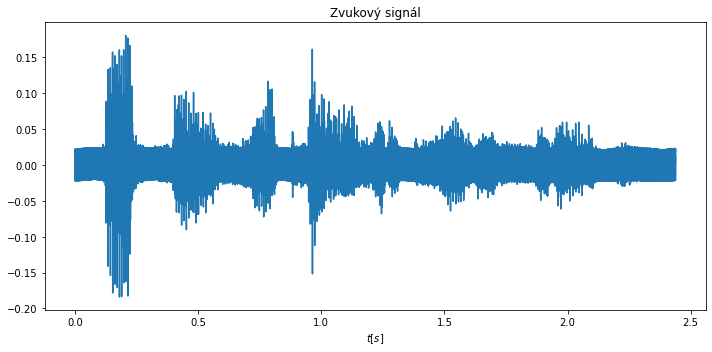

In [233]:
s, fs = sf.read('../audio/xrezni29.wav')

print("maximální hodnota je ",max(s))
print("minimální hodnota je ",min(s))
t = np.arange(s.size) / fs
print("délka ve vzorcích je",len(s))
print("Délka v sekundách je",t[-1])
plt.figure(figsize=(10,5))
plt.plot(t, s)
plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()


[]
75
76


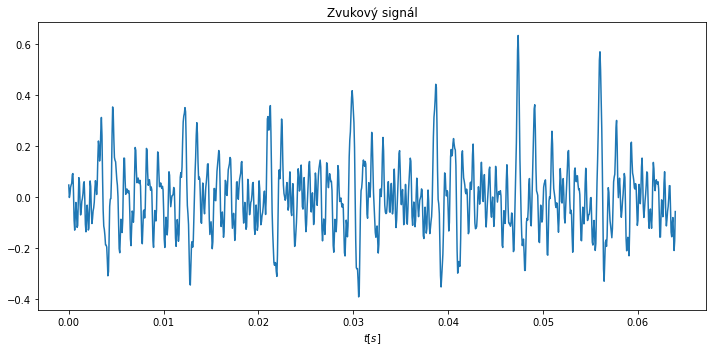

In [234]:
r = []
cnt = 0 
q = 0
counter_pr2 = 0
counter_pr2_2 = 0
d = max(abs(s))
str_hod = s.mean()
for i in range(len(s)):
  s[i] = s[i]-str_hod
  s[i] = s[i]/d

for i in range(int((len(s))/512)):
  r.append([])
print(r[-1])
for i in range(len(s)+37*1024+512):
  r[counter_pr2].append(s[i-counter_pr2_2])
  q+=1
  if q == 1024:
    q=0
    counter_pr2+=1
    counter_pr2_2+=512
print(counter_pr2)
print(len(r))
plt.figure(figsize=(10,5))
t= np.arange(len(r[23])) / fs
plt.plot(t,r[23])
plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()


Is DFT close to fft? True


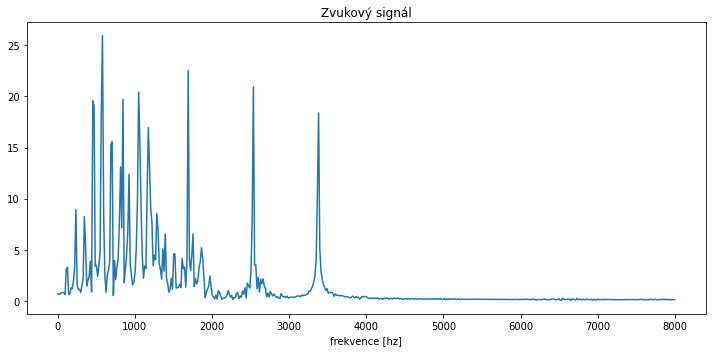

In [235]:
def DFT(x):
    N = len(x)
    if N <= 1:
        return x
    else:
        even = DFT(x[::2])
        odd = DFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        X = np.concatenate([even+factor[:int(N/2)]*odd, even+factor[int(N/2):]*odd])
        return X

x = r[24][:1024]
np
x2 = numpy.fft.fft(x)
x=DFT(x)
x = abs(x[:512])
frequency = np.linspace (0.0, 8000, 512)
plt.figure(figsize=(10,5))
plt.plot(frequency,x)
plt.gca().set_xlabel('frekvence [hz]')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()

print('Is DFT close to fft?',numpy.allclose(x - abs(x2[:512]),1e-12))


8000.0


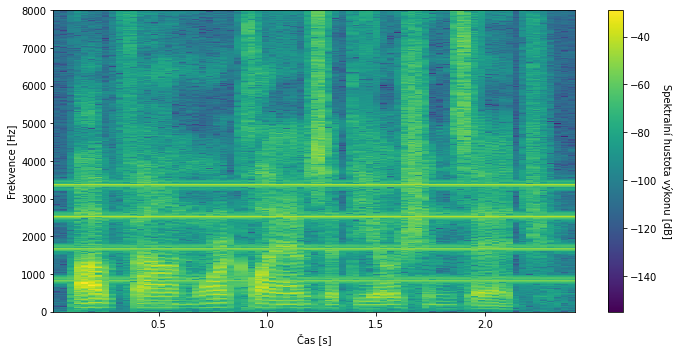

In [236]:
f, t, sgr = spectrogram(s, fs, nperseg=1024,noverlap=512)

sgr_log = 10 * np.log10(sgr+1e-20)
plt.figure(figsize=(10,5))
plt.pcolormesh(t,f,sgr_log,shading='auto')
ax = plt.gca()
print(f[-1])
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()


39015
842.28515625
1684.5703125
2526.85546875
3369.140625
3369.140625
13473.14453125
1684.5703125
842.28515625


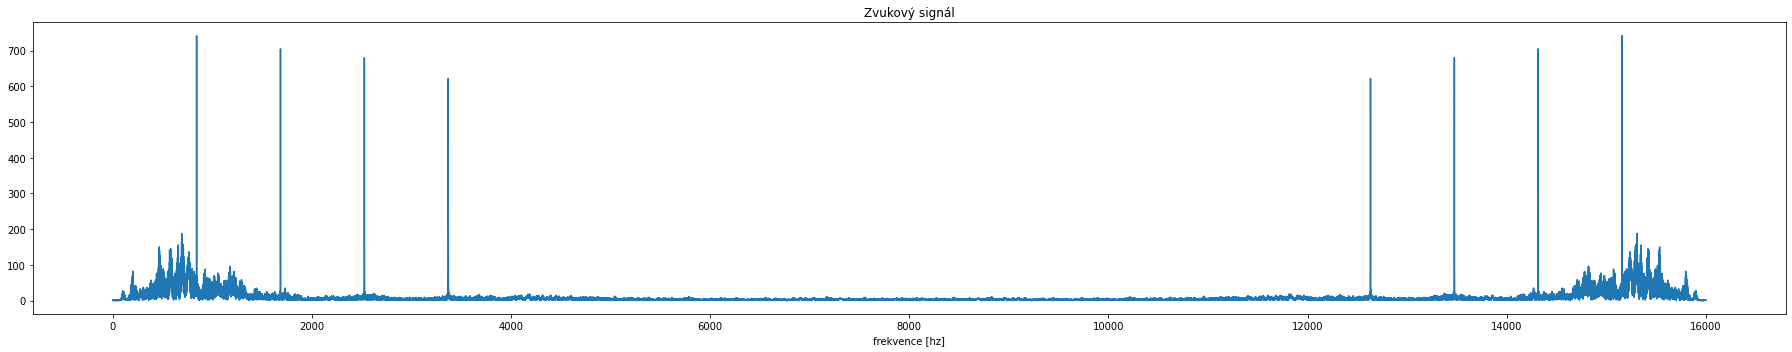

In [237]:

x = s[:32768]
print(len(s))
np
x2 = numpy.fft.fft(x)
x=DFT(x)
x = abs(x[:32768])
for i in x:
    if i > 600:
        print(list(x).index(i)/2.048)


frequency = np.linspace (0.0, 16000, 32768)
plt.figure(figsize=(25,5))
plt.plot(frequency,x)
plt.gca().set_xlabel('frekvence [hz]')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()
f1=862.5
f2=1725.0
f3=2587.5
f4=3450.0


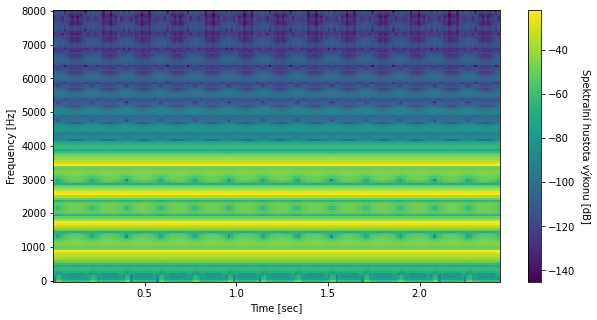

In [238]:
time = np.arange(s.size) / fs

carrier =  np.cos(2*np.pi*f1*time)
carrier2 =  np.cos(2*np.pi*f2*time)
carrier3 =  np.cos(2*np.pi*f3*time)
carrier4 = np.cos(2*np.pi*f4*time)
x = carrier + carrier2 + carrier3 + carrier4
f, t, Sxx = signal.spectrogram(x, fs)
plt.figure(figsize=(10,5))
Sxx = 10*np.log10(Sxx+1e-20) 
ax = plt.gca()

plt.pcolormesh(t, f, Sxx,shading='auto')
plt.ylabel('Frequency [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.xlabel('Time [sec]')
plt.show()

d = max(abs(x))
for i in range(len(x)):
  x[i] = x[i]/d
scipy.io.wavfile.write('../audio/4cos.wav',fs,(x * np.iinfo(np.int16).max).astype(np.int16))


0.05024864190431235


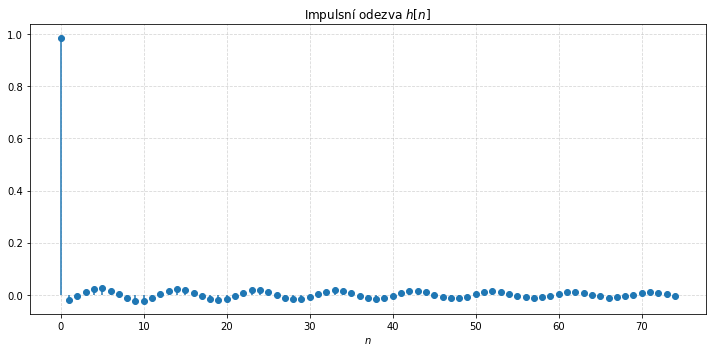

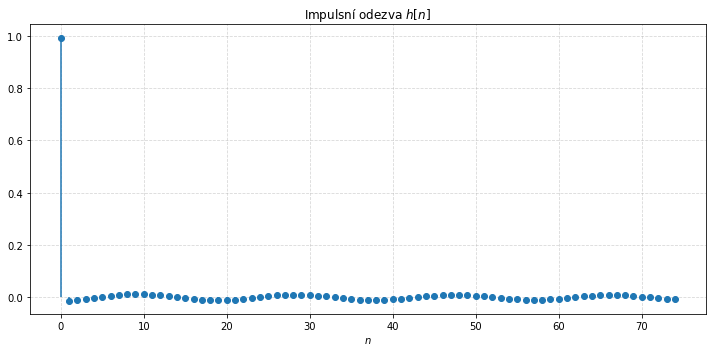

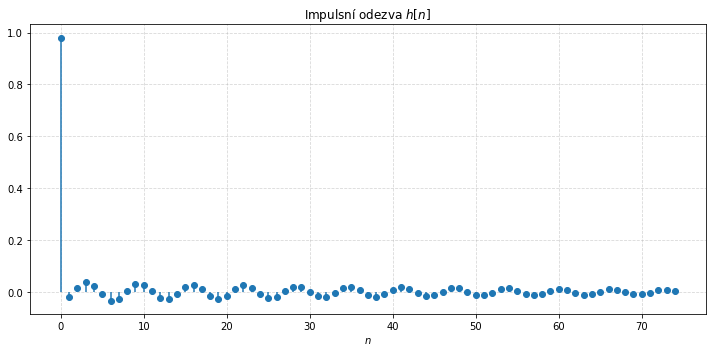

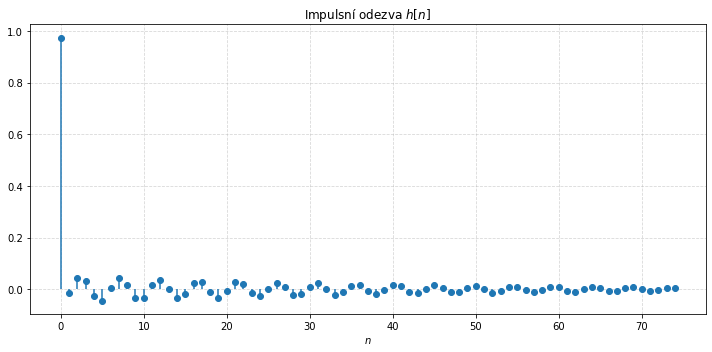

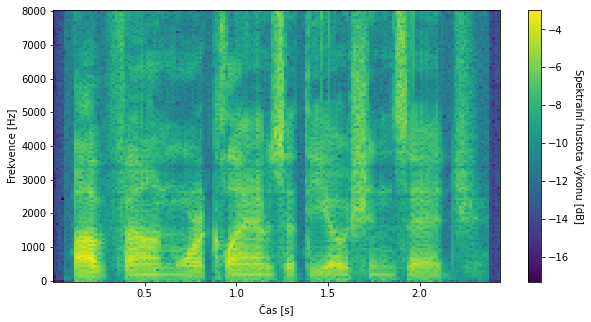

In [239]:
def impuls_odez(b,a):

    N_imp = len(r)-1
    imp = [1, *np.zeros(N_imp-1)]
    h = lfilter(b, a, imp)
    plt.figure(figsize=(10,5))
    plt.stem(np.arange(N_imp), h, basefmt=' ')
    plt.gca().set_xlabel('$n$')
    plt.gca().set_title('Impulsní odezva $h[n]$')

    plt.grid(alpha=0.5, linestyle='--')

    plt.tight_layout()




f1=842.28515625
f2=1684.5703125
f3=2526.85546875
f4=3369.140625
t = np.arange(s.size) / fs
b, a = signal.iirnotch(f2, 25.0, fs)
impuls_odez(b,a)
z1, p1, k1 = tf2zpk(b, a)
w1, H1 = freqz(b, a)
output_signal = scipy.signal.filtfilt(b, a, s)
b, a = signal.iirnotch(f1, 25.0, fs)
impuls_odez(b,a)
z2, p2, k2 = tf2zpk(b, a)
w2, H2 = freqz(b, a)
output_signal = scipy.signal.filtfilt(b, a, output_signal)
b, a = signal.iirnotch(f3, 25.0, fs)
impuls_odez(b,a)
z3, p3, k3 = tf2zpk(b, a)
w3, H3 = freqz(b, a)
output_signal = scipy.signal.filtfilt(b, a, output_signal)
b, a = signal.iirnotch(f4, 25.0, fs)
impuls_odez(b,a)
output_signal = scipy.signal.filtfilt(b, a, output_signal)
z4, p4, k4 = tf2zpk(b, a)
w4, H4 = freqz(b, a)
q = []
for i in range(1000):
    q.append(output_signal[i])
    if 0.0001 < abs(output_signal[i]):
        output_signal[i] = 0
for i in range(len(output_signal)-1000,len(output_signal)):
    q.append(output_signal[i])
    if 0.0001 < abs(output_signal[i]):
        output_signal[i] = 0

print(abs(max(q)))

f, t, sgr = spectrogram(output_signal, fs)
sgr_log = np.log10(sgr+1e-20) 
plt.figure(figsize=(10,5))
plt.pcolormesh(t,f,sgr_log,shading='auto')
ax = plt.gca()
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)



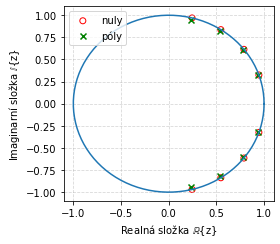

In [240]:
plt.figure(figsize=(4,3.5))

# jednotkova kruznice
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

# nuly, poly
plt.scatter(np.real(z1), np.imag(z1), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p1), np.imag(p1), marker='x', color='g', label='póly')
plt.scatter(np.real(z2), np.imag(z2), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p2), np.imag(p2), marker='x', color='g')
plt.scatter(np.real(z3), np.imag(z3), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p3), np.imag(p3), marker='x', color='g')
plt.scatter(np.real(z4), np.imag(z4), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p4), np.imag(p4), marker='x', color='g')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper left')

plt.tight_layout()

Text(0.5, 1.0, 'Argument frekvenční charakteristiky $\\mathrm{arg}\\ H(e^{j\\omega})$ pro 3369.140625')

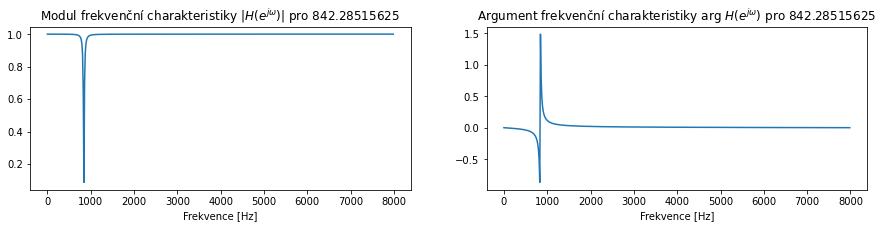

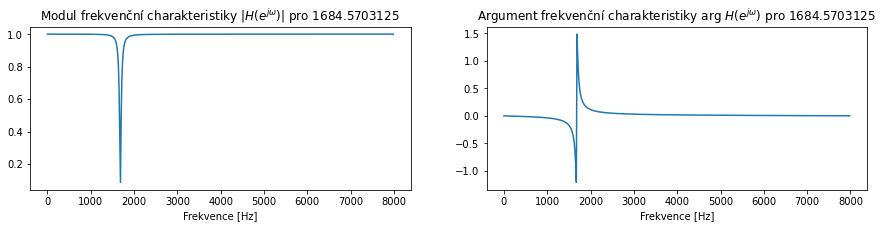

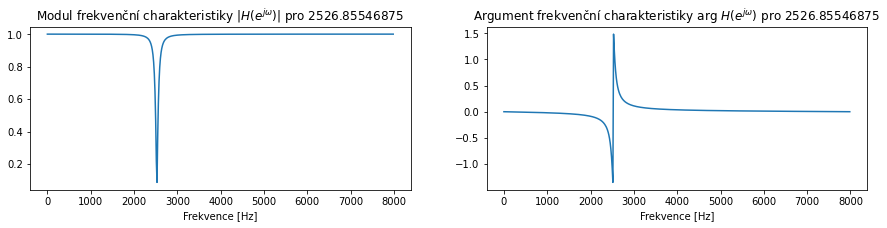

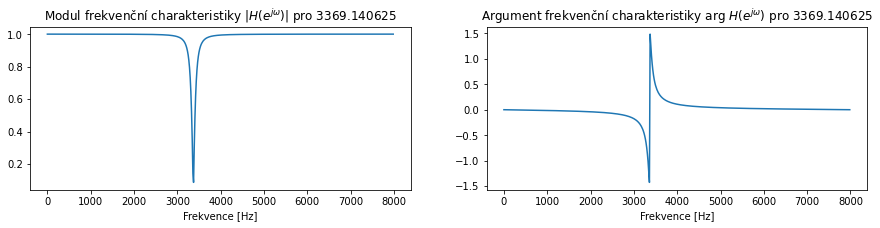

In [241]:
_, ax = plt.subplots(1, 2, figsize=(15,3))

ax[0].plot(w2 / 2 / np.pi * fs, np.abs(H2))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$ pro '+ str(f1))

ax[1].plot(w2 / 2 / np.pi * fs, np.angle(H2))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$ pro '+ str(f1))

_, ax = plt.subplots(1, 2, figsize=(15,3))
ax[0].plot(w1 / 2 / np.pi * fs, np.abs(H1))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$ pro '+ str(f2))

ax[1].plot(w1 / 2 / np.pi * fs, np.angle(H1))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$ pro '+ str(f2))
_, ax = plt.subplots(1, 2, figsize=(15,3))
ax[0].plot(w3 / 2 / np.pi * fs, np.abs(H3))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$ pro '+ str(f3))

ax[1].plot(w3 / 2 / np.pi * fs, np.angle(H3))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$ pro '+ str(f3))
_, ax = plt.subplots(1, 2, figsize=(15,3))
ax[0].plot(w4 / 2 / np.pi * fs, np.abs(H4))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$ pro '+ str(f4))

ax[1].plot(w4 / 2 / np.pi * fs, np.angle(H4))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$ pro '+ str(f4))



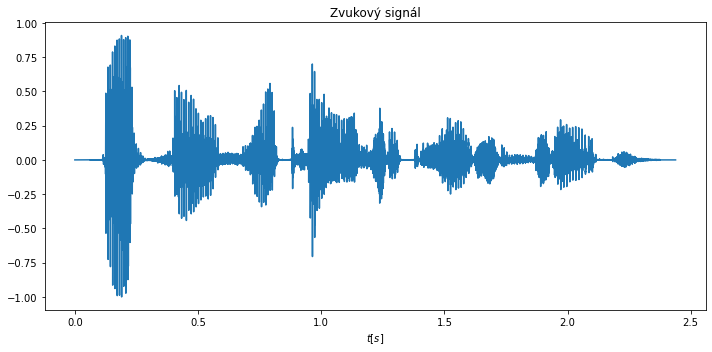

In [242]:

d = max(abs(output_signal))
for i in range(len(output_signal)):
  output_signal[i] = output_signal[i]/d
t = np.arange(output_signal.size) / fs
plt.figure(figsize=(10,5))
plt.plot(t, output_signal)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()
scipy.io.wavfile.write('../audio/clean_bandstop.wav',fs,(output_signal * np.iinfo(np.int16).max).astype(np.int16))
